In [251]:
import pandas as pd
from pathlib import Path
import hvplot.pandas
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import plotly.express as px
import panel as pn

In [2]:
# Import and read csv files
silver=Path('../Ameera/silver_nasdaq.csv')
silver_df=pd.read_csv(silver, parse_dates=True, index_col="Date", infer_datetime_format = True)
#silver_df['Date']=pd.to_datetime(silver_df['Date'],dayfirst=True)
#silver_df.set_index(silver_df['Date'],inplace=True)
#silver_df.drop(columns=['Date'],inplace=True)


#count nulls
silver_df.isnull().mean()
silver_df.isnull().sum()

Close/Last    0
Volume        9
Open          0
High          0
Low           0
dtype: int64

In [158]:
#drop nulls
silver_df.dropna(inplace=True)
silver_df.head()

Close/Last   Volume    Open    High     Low
Date                                                   
2021-06-29      25.901  71600.0  26.235  26.235  25.580
2021-06-28      26.254  39778.0  26.220  26.335  25.875
2021-06-25      26.126  30865.0  26.055  26.415  26.010
2021-06-24      26.089  24656.0  25.980  26.280  25.905
2021-06-23      26.152  22485.0  25.890  26.410  25.850

In [4]:
silver_df.pct_change().dropna(inplace=True)
#silver_df.head()

In [5]:
#read gold data
gold=Path('../Ameera/gold_nasdaq.csv')
gold_df=pd.read_csv(gold,  parse_dates=True, index_col="Date", infer_datetime_format = True)
#gold_df['Date']=pd.to_datetime(gold_df['Date'],dayfirst=True)
#gold_df.set_index(gold_df['Date'],inplace=True)
#gold_df.drop(columns=['Date'],inplace=True)


#count nulls
gold_df.isnull().mean()
gold_df.isnull().sum()


Close/Last    0
Volume        3
Open          0
High          0
Low           0
dtype: int64

In [6]:
# Drop nulls
gold_df.dropna(inplace=True)
gold_df.head()

Close/Last    Volume    Open    High     Low
Date                                                    
2021-06-29      1763.6  232701.0  1778.8  1779.2  1750.1
2021-06-28      1780.7  158467.0  1782.0  1786.1  1770.4
2021-06-25      1777.8  158121.0  1775.7  1791.0  1773.6
2021-06-24      1776.7  148872.0  1778.2  1788.6  1772.7
2021-06-23      1783.4  175084.0  1779.1  1795.6  1773.1

In [7]:
# Read Platinum data
platinum=Path('../Ameera/platinum_nasdaq.csv')
platinum_df=pd.read_csv(platinum,  parse_dates=True, index_col="Date", infer_datetime_format = True)
#platinum_df['Date']=pd.to_datetime(platinum_df['Date'],dayfirst=True)
#platinum_df.set_index(platinum_df['Date'],inplace=True)
#platinum_df.drop(columns=['Date'],inplace=True)


#count nulls 
platinum_df.isnull().mean()
platinum_df.isnull().sum()

Close/Last     0
Volume        58
Open           0
High           0
Low            0
dtype: int64

In [8]:
#drop nulls

platinum_df.dropna(inplace=True)
platinum_df.isnull().sum()

Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [9]:
# grab the date and close columns for each

Gold=gold_df.loc[:,['Close/Last','Volume']]
Silver=silver_df.loc[:,['Close/Last','Volume']]
Platinum=platinum_df.loc[:,['Close/Last','Volume']]

In [10]:
#concat the three graphs
precious_metals=pd.concat([Gold,Silver,Platinum],axis='columns',join='inner')
precious_metals.tail()

Close/Last    Volume  Close/Last    Volume  Close/Last   Volume
Date                                                                       
2016-07-06      1367.1  226256.0      20.203   76564.0      1091.3  16058.0
2016-07-05      1358.7  337002.0      19.907  169563.0      1076.9  24558.0
2016-07-01      1339.0   63821.0      19.588   25064.0      1057.1   3323.0
2016-06-30      1320.6  182812.0      18.582   54738.0      1024.3  13365.0
2016-06-29      1326.9  164974.0      18.362   86786.0      1013.5  22729.0

In [11]:

columns=['Gold','Gold Volume','Silver','Silver Volume','Platinum','Platinum Volume']
precious_metals.columns=columns
precious_metals.hvplot(title='Precious Metals',xlabel='Date',ylabel='Close',figsize=(20,30))

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [12]:
all_metals=precious_metals.drop(columns=['Silver Volume','Gold Volume','Platinum Volume'])
columns_2=['Gold','Silver','Platinum']
all_metals.columns=columns_2
all_metals.head()


Gold  Silver  Platinum
Date                                
2021-06-29  1763.6  25.901    1070.6
2021-06-28  1780.7  26.254    1099.5
2021-06-25  1777.8  26.126    1105.7
2021-06-24  1776.7  26.089    1096.1
2021-06-23  1783.4  26.152    1089.5

In [245]:
all_metals.hvplot(title='Precious Metals',xlabel='Date',ylabel='Close',figsize=(20,30))

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [14]:
metals=precious_metals.drop(columns=['Gold','Silver','Platinum'])
columns_3=['Gold Volume','Silver Volume','Platinum Volume']
metals.columns=columns_3
metals.tail()

Gold Volume  Silver Volume  Platinum Volume
Date                                                   
2016-07-06     226256.0        76564.0          16058.0
2016-07-05     337002.0       169563.0          24558.0
2016-07-01      63821.0        25064.0           3323.0
2016-06-30     182812.0        54738.0          13365.0
2016-06-29     164974.0        86786.0          22729.0

In [15]:
metals.hvplot(title='Precious Metals Volume',xlabel='Date',ylabel='Close',figsize=(20,30))

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [16]:
precious_metals.pct_change().sum()


Gold                   -0.233615
Gold Volume        206847.746777
Silver                 -0.127998
Silver Volume      293785.388336
Platinum                0.137407
Platinum Volume    137756.168903
dtype: float64

In [17]:
precious_metals_std=all_metals.std()*np.sqrt(252)
precious_metals_std


Gold        3898.719592
Silver        62.623474
Platinum    1792.961969
dtype: float64

In [18]:
precious_metals.head()

Gold  Gold Volume  Silver  Silver Volume  Platinum  \
Date                                                               
2021-06-29  1763.6     232701.0  25.901        71600.0    1070.6   
2021-06-28  1780.7     158467.0  26.254        39778.0    1099.5   
2021-06-25  1777.8     158121.0  26.126        30865.0    1105.7   
2021-06-24  1776.7     148872.0  26.089        24656.0    1096.1   
2021-06-23  1783.4     175084.0  26.152        22485.0    1089.5   

            Platinum Volume  
Date                         
2021-06-29          18272.0  
2021-06-28          16181.0  
2021-06-25           9942.0  
2021-06-24           8257.0  
2021-06-23          10028.0

In [19]:
precious_metals.index

DatetimeIndex(['2021-06-29', '2021-06-28', '2021-06-25', '2021-06-24',
               '2021-06-23', '2021-06-22', '2021-06-21', '2021-06-18',
               '2021-06-17', '2021-06-16',
               ...
               '2016-07-13', '2016-07-12', '2016-07-11', '2016-07-08',
               '2016-07-07', '2016-07-06', '2016-07-05', '2016-07-01',
               '2016-06-30', '2016-06-29'],
              dtype='datetime64[ns]', name='Date', length=1198, freq=None)

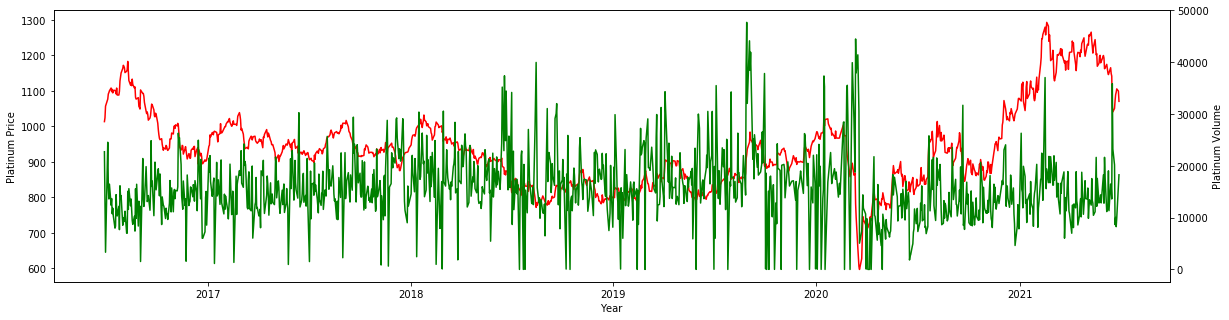

In [250]:
#precious_metals.rolling(window=21).std().plot(title='21-day Window', figsize=(20,10))


fig,ax = plt.subplots(figsize=(20,5))
ax.plot(precious_metals.index, precious_metals['Platinum'], color="red")
ax.set_xlabel("Year")
ax.set_ylabel("Platinum Price")
ax2 = ax.twinx()
ax2.plot(precious_metals.index, precious_metals['Platinum Volume'],color="green")
ax2.set_ylabel("Platinum Volume")
plt.show()

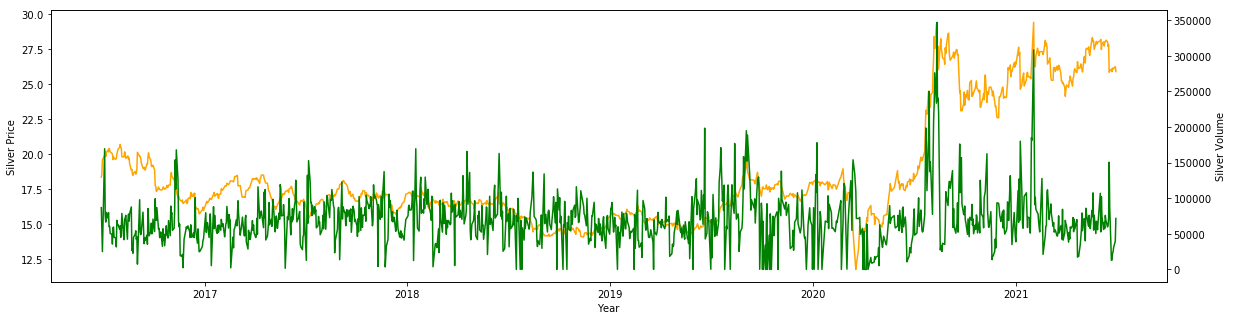

In [21]:
fig,ax = plt.subplots(figsize=(20,5))
ax.plot(precious_metals.index, precious_metals["Silver"], color="orange")
ax.set_xlabel("Year")
ax.set_ylabel("Silver Price")
ax2 = ax.twinx()
ax2.plot(precious_metals.index, precious_metals["Silver Volume"],color="green")
ax2.set_ylabel("Silver Volume")
plt.show()

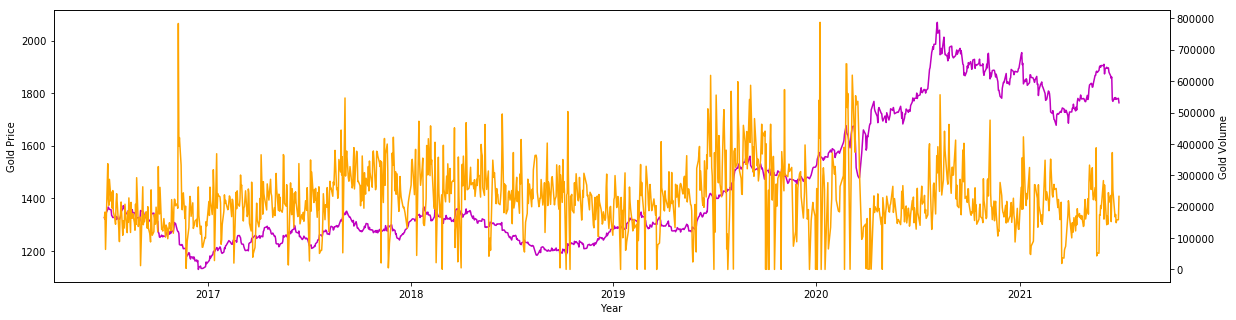

In [22]:
fig,ax = plt.subplots(figsize=(20,5))
ax.plot(precious_metals.index, precious_metals['Gold'], color="m")
ax.set_xlabel("Year")
ax.set_ylabel("Gold Price")
ax2 = ax.twinx()
ax2.plot(precious_metals.index, precious_metals['Gold Volume'],color="orange")
ax2.set_ylabel("Gold Volume")
plt.show()

In [23]:
vaccine=Path('../Ameera/share-people-fully-vaccinated-covid.csv')
covid=pd.read_csv(vaccine,  parse_dates=True, index_col="Day", infer_datetime_format = True)
covid.drop(columns=['Code','145609-annotations'],inplace=True)


covid.head()

Entity  people_fully_vaccinated_per_hundred
Day                                                         
2021-05-11  Afghanistan                                 0.14
2021-05-20  Afghanistan                                 0.20
2021-05-24  Afghanistan                                 0.25
2021-05-26  Afghanistan                                 0.29
2021-05-27  Afghanistan                                 0.29

In [58]:
covid_vaccine=covid.groupby([covid['Entity'],covid.index.year,covid.index.month]).mean()
covid_vaccine.index.names=['Entity','Year','Month']
covid_vaccine.reset_index(inplace=True)
covid_vaccine.head()

Entity  Year  Month  people_fully_vaccinated_per_hundred
0  Afghanistan  2021      5                             0.246667
1  Afghanistan  2021      6                             0.435714
2       Africa  2021      2                             0.003750
3       Africa  2021      3                             0.150968
4       Africa  2021      4                             0.340000

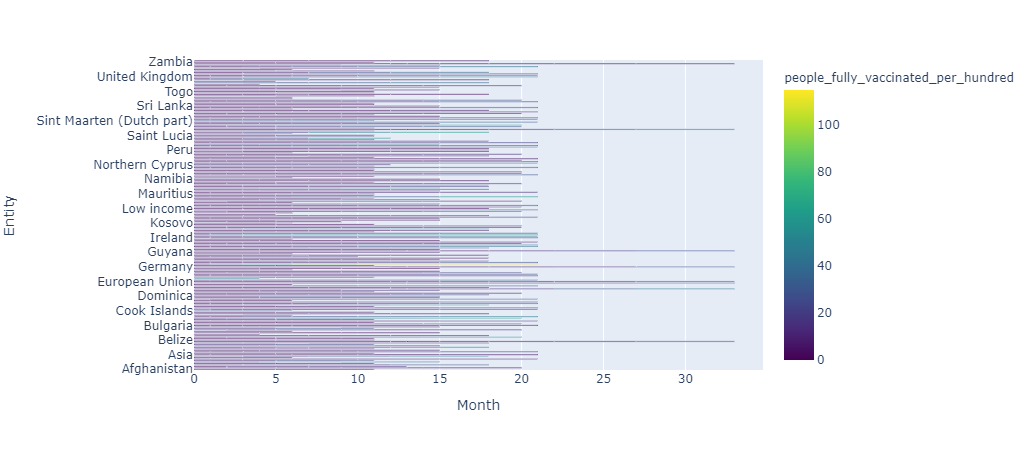

In [25]:
plot = px.bar(
    covid_vaccine, 
    x = 'Month', 
    y = 'Entity', 
    color = 'people_fully_vaccinated_per_hundred', 
    color_continuous_scale = px.colors.sequential.Viridis,
)
plot.show()

In [215]:
China=covid_vaccine.loc[131]
China=China.to_frame()
China=China.T
print(China)

    Entity  Year Month people_fully_vaccinated_per_hundred
131  China  2021     6                               15.51


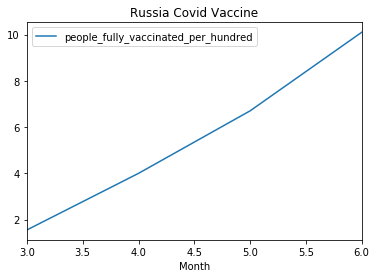

In [216]:
Russia=covid_vaccine.loc[604:607]
Russia.plot(title='Russia Covid Vaccine',x='Month',y='people_fully_vaccinated_per_hundred')

In [217]:
Russia.head()

Entity  Year  Month  people_fully_vaccinated_per_hundred
604  Russia  2021      3                             1.552222
605  Russia  2021      4                             4.000000
606  Russia  2021      5                             6.703333
607  Russia  2021      6                            10.101667

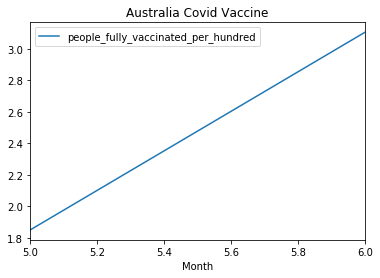

In [218]:
Australia=covid_vaccine.loc[38:39]
Australia.plot(title='Australia Covid Vaccine',x='Month',y='people_fully_vaccinated_per_hundred')

In [219]:
Australia.head()

Entity  Year  Month  people_fully_vaccinated_per_hundred
38  Australia  2021      5                             1.850000
39  Australia  2021      6                             3.106154

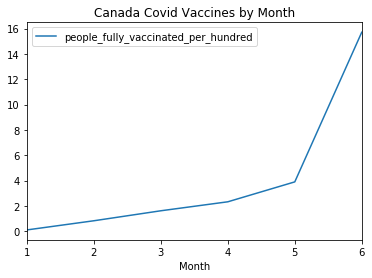

In [220]:
Canada=covid_vaccine.loc[112:117]
Canada.head(10)
Canada.plot(title='Canada Covid Vaccines by Month',x='Month',y='people_fully_vaccinated_per_hundred')

In [221]:
Canada.head(10)

Entity  Year  Month  people_fully_vaccinated_per_hundred
112  Canada  2021      1                             0.103846
113  Canada  2021      2                             0.827143
114  Canada  2021      3                             1.615484
115  Canada  2021      4                             2.324333
116  Canada  2021      5                             3.896452
117  Canada  2021      6                            15.709000

In [254]:
covid_vaccines_df=pd.concat([Russia,China,Australia,Canada,United_States])

covid_vaccines_df.head()

Entity  Year Month people_fully_vaccinated_per_hundred
604  Russia  2021     3                             1.55222
605  Russia  2021     4                                   4
606  Russia  2021     5                             6.70333
607  Russia  2021     6                             10.1017
131   China  2021     6                               15.51

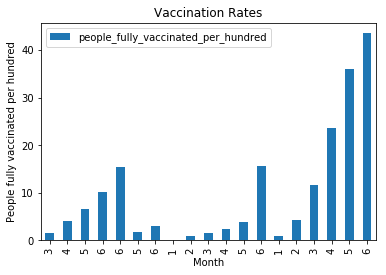

In [235]:
covid_vaccines_df.plot.bar(title='Vaccination Rates',x='Month',y='people_fully_vaccinated_per_hundred')
plt.ylabel('People fully vaccinated per hundred')
plt.show()


In [242]:
covid_vaccines_df.hvplot.bar(title='Vaccination Rates',x='Month',y='people_fully_vaccinated_per_hundred',groupby='Entity')

:DynamicMap   [Entity]
   :Bars   [Month]   (people_fully_vaccinated_per_hundred)

In [252]:
# converting bar and line chart functions 

price_pn=pn.pane.Matplotlib(precious_metals, tight=True)
price_volume_pn=pn.pane.Matplotlib(all_metals, tight=True)
volume_pn=pn.pane.Matplotlib(metals, tight=True)


ValueError: Matplotlib pane does not support objects of type 'DataFrame'.

In [253]:
# create a Title for the Dashboard 
title= pn.pane.Markdown('Commodities and COVID..')

# Define a welcome text

welcome_text= pn.pane.Markdown(' In this Data Analysis we will explore how the Commodities Market was impacted during COVID-19 ')

#converting charts to create Dashboard
Welcome_text=pn.Column(welcome_text)
price_and_volume=pn.Row(price_pn,price_volume_pn,volume_pn)


NameError: name 'price_pn' is not defined